# Aula 5 - Visualização de Dados em Python com Matplotlib 12/09/25

Essa etapa do desenvolvimento iremos explorar a parte grafica dos dados, podendo comunicar achados e validar hipoteses em sua grande maioria por meio de graficos no python.

# Anatomia do matplotlib e APIs de uso

- Figure: a “tela” ou canvas. Pode conter uma ou várias áreas de plotagem (Axes).
- Axes: onde o gráfico é desenhado (eixo X/Y, ticks, rótulos, grade, título).
- Duas formas de uso:
    1. API de estado (procedural): `import matplotlib.pyplot as plt` e usar `plt.plot(...)`, `plt.title(...)`, etc. É rápida para gráficos simples.
    2. API orientada a objetos (OO): `fig, ax = plt.subplots()` e então `ax.plot(...)`, `ax.set_title(...)`. Dá controle fino e é ideal para múltiplos subplots ou gráficos complexos.

Boas práticas iniciais:

- Preferir OO quando você tiver mais de um gráfico na mesma figura ou precisar de personalizações extensas.
- Usar `fig.tight_layout()` ou `constrained_layout=True` para evitar cortes de rótulos.
- Separar preparação dos dados e plotagem (código mais claro e reaproveitável).

# Personalização essencial

## Títulos, rótulos, legendas e grade

- `ax.set_title("…")`, `ax.set_xlabel("…")`, `ax.set_ylabel("…")`.
- `ax.legend()` quando houver múltiplas séries com `label='...'`.
- `ax.grid(True, linestyle='--', alpha=0.4)` para leitura de valores.

## Estilos, cores e marcadores

- Linhas: `linestyle='--'`, `linewidth=2`; marcadores: `marker='o'`, `markerfacecolor` etc.
- Paletas/colormaps: `viridis`, `plasma`, `inferno`, `cividis` (boa para daltônicos).
- Evite usar apenas cor para codificar categorias (use marcadores, rótulos).

## Escalas e limites

- `ax.set_xscale('log')` / `ax.set_yscale('log')` quando a distribuição for log-normal ou houver várias ordens de grandeza.
- `ax.set_xlim(min, max)` / `ax.set_ylim(min, max)` para focar a região relevante.

## Anotações e destaques

- `ax.annotate('pico', xy=(x0, y0), xytext=(x0+1, y0+5), arrowprops=dict(arrowstyle='->'))` para apontar eventos.
- `ax.axvline(...)`, `ax.axhline(...)`, `ax.axvspan(...)`, `ax.axhspan(...)` para linhas/regiões de referência.

## Layout e múltiplos subplots

- `fig, axs = plt.subplots(nrows, ncols, figsize=(... ), constrained_layout=True)`.
- `fig.tight_layout()` para ajustar espaçamentos.

## Exportação com qualidade

- `fig.savefig('arquivo.png', dpi=300, bbox_inches='tight', transparent=False)`
- Formatos: `.png` (raster), `.pdf`/`.svg` (vetorial, ideal para impressão).

# Gráficos principais: quando usar, passos e código

Atenção: todos os exemplos abaixo podem ser colados e executados. Ao final, há um script completo com funções para cada gráfico e um main().

## 1. Gráfico de Linha (line plot)


Quando usar

- Séries temporais, evolução de métricas ao longo do tempo, tendências e comparações de linhas (ex.: visitas por dia, consumo por hora).

Passos essenciais

- Ordenar por tempo (se aplicável), nomear eixos com unidades, considerar suavização apenas se fizer sentido analítico.

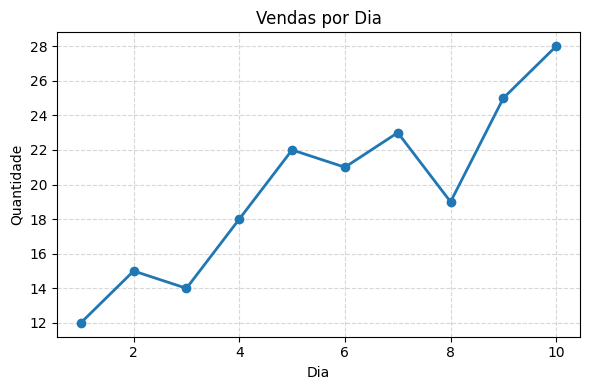

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def grafico_linha():
    dias = np.arange(1, 11)
    vendas = np.array([12, 15, 14, 18, 22, 21, 23, 19, 25, 28])

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.plot(dias, vendas, marker='o', linewidth=2)
    ax.set_title('Vendas por Dia')
    ax.set_xlabel('Dia')
    ax.set_ylabel('Quantidade')
    ax.grid(True, linestyle='--', alpha=0.5)
    fig.tight_layout()
    plt.show()

grafico_linha()

# 2. Barras (simples, agrupadas, empilhadas, horizontal)

Quando usar

- Comparações entre categorias.
- Agrupadas: comparar subcategorias lado a lado (ex.: vendas por produto em 2 lojas).
- Empilhadas: enfatizar o total e a composição (proporção).
- Horizontal: útil quando rótulos de categoria são longos.

## Barras simples

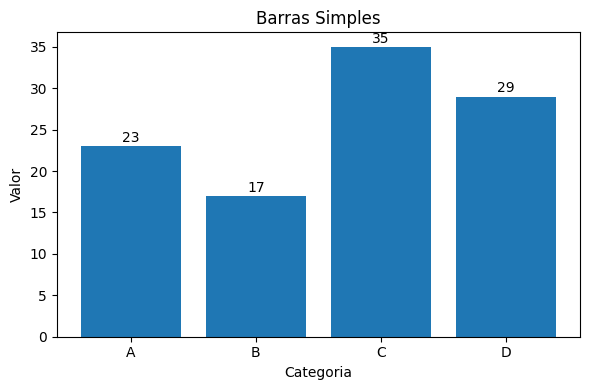

In [18]:
def barras_simples():
    categorias = ['A', 'B', 'C', 'D']
    valores = [23, 17, 35, 29]

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(categorias, valores)
    ax.set_title('Barras Simples')
    ax.set_xlabel('Categoria')
    ax.set_ylabel('Valor')
    for i, v in enumerate(valores):
        ax.text(i, v + 0.5, str(v), ha='center')
    fig.tight_layout()
    plt.show()

barras_simples()

## Barras Agrupadas

In [ ]:
def barras_agrupadas():
    categorias = ['Q1', 'Q2', 'Q3', 'Q4']
    loja1 = [15, 18, 20, 22]
    loja2 = [12, 14, 21, 19]

    x = np.arange(len(categorias))
    largura = 0.35

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(x - largura/2, loja1, largura, label='Loja 1')
    ax.bar(x + largura/2, loja2, largura, label='Loja 2')
    ax.set_title('Barras Agrupadas')
    ax.set_xticks(x, categorias)
    ax.set_ylabel('Vendas')
    ax.legend()
    fig.tight_layout()
    plt.show()

barras_agrupadas()

## Barras empilhadas

In [ ]:
def barras_empilhadas():
    categorias = ['Serviços', 'Produtos', 'Assinaturas']
    base = [30, 40, 20]
    adicional = [10, 15, 5]

    x = np.arange(len(categorias))

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(x, base, label='Base')
    ax.bar(x, adicional, bottom=base, label='Adicional')
    ax.set_title('Barras Empilhadas')
    ax.set_xticks(x, categorias)
    ax.set_ylabel('Receita')
    ax.legend()
    fig.tight_layout()
    plt.show()

barras_empilhadas()

## Barras horizontais

In [ ]:
def barras_horizontais():
    linguagens = ['Python', 'Java', 'C#', 'JavaScript']
    vagas = [120, 100, 80, 150]

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.barh(linguagens, vagas)
    ax.set_title('Vagas por Linguagem (Horizontal)')
    ax.set_xlabel('Quantidade de Vagas')
    fig.tight_layout()
    plt.show()

barras_horizontais()

# 3. Pizza (pie chart) usar com parcimônia

Quando usar:

- Poucas categorias (ideal ≤ 5) e diferenças claras.
- Evitar quando há muitas fatias ou diferenças mínimas (barras são melhores).

## Pizza

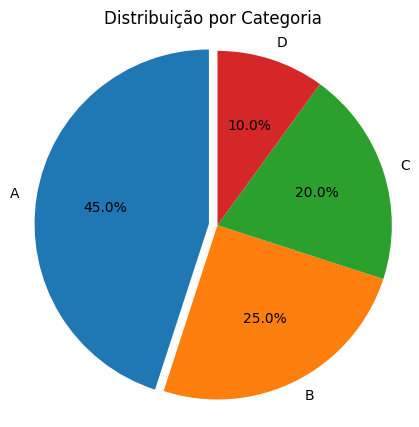

In [16]:
def grafico_pizza():
    categorias = ['A', 'B', 'C', 'D']
    valores = [45, 25, 20, 10]
    explode = [0.05, 0, 0, 0]

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=90, explode=explode)
    ax.set_title('Distribuição por Categoria')
    ax.axis('equal')  # pizza “redonda”
    plt.show()

grafico_pizza()

# 4. Histograma (distribuição)

Quando usar

- Entender a distribuição de uma variável contínua (ex.: tempos de resposta, valores monetários).
- Escolha de bins afeta a leitura; teste valores diferentes.

## Histograma

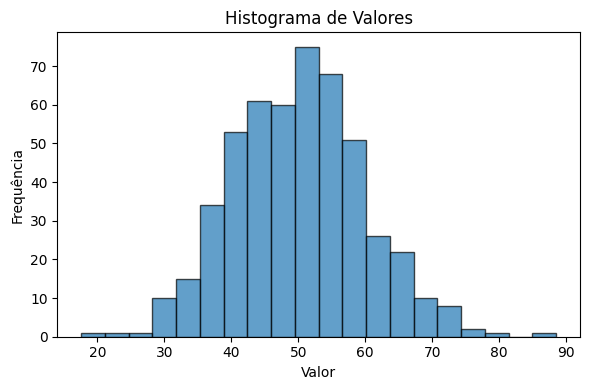

In [8]:
def histograma():
    np.random.seed(42)
    dados = np.random.normal(loc=50, scale=10, size=500)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.hist(dados, bins=20, edgecolor='black', alpha=0.7)
    ax.set_title('Histograma de Valores')
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frequência')
    fig.tight_layout()
    plt.show()

histograma()

# 5. Boxplot e Violino

Quando usar

- Comparar distribuições entre grupos, visualizar mediana, quartis, outliers (boxplot).
- Violino mostra a densidade (requer dados suficientes). O matplotlib possui `violinplot`.

## Boxplot / Violino

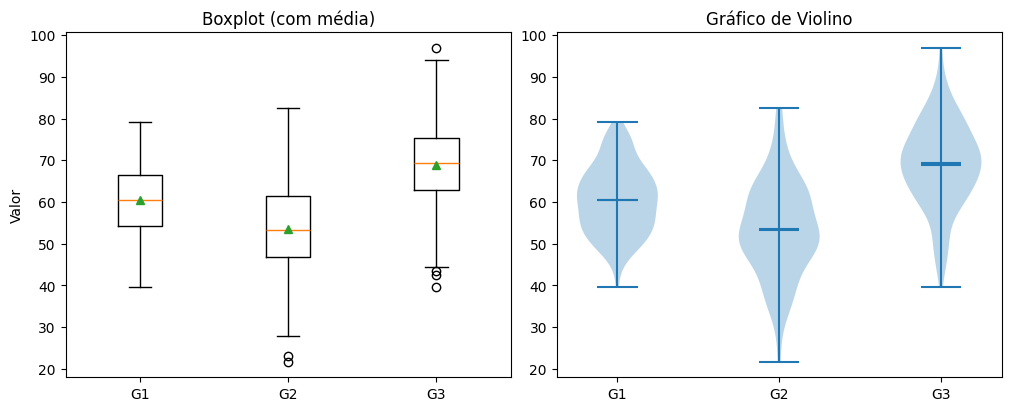

In [10]:
def boxplot_e_violino():
    np.random.seed(0)
    grupo1 = np.random.normal(60, 8, 200)
    grupo2 = np.random.normal(55, 12, 200)
    grupo3 = np.random.normal(70, 10, 200)
    dados = [grupo1, grupo2, grupo3]

    fig, ax = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

    ax[0].boxplot(dados, tick_labels=['G1', 'G2', 'G3'], showmeans=True) #tive que atualizar labels para tick_labels
    ax[0].set_title('Boxplot (com média)')
    ax[0].set_ylabel('Valor')

    parts = ax[1].violinplot(dados, showmeans=True, showmedians=True)
    ax[1].set_title('Gráfico de Violino')
    ax[1].set_xticks([1, 2, 3])
    ax[1].set_xticklabels(['G1', 'G2', 'G3'])

    plt.show()

boxplot_e_violino()

# 6. Dispersão (scatter)

Quando usar

- Relação entre duas variáveis numéricas; identificar correlação, clusters, outliers.
- Pode codificar uma terceira variável por cor ou tamanho do marcador.

## Dispersão

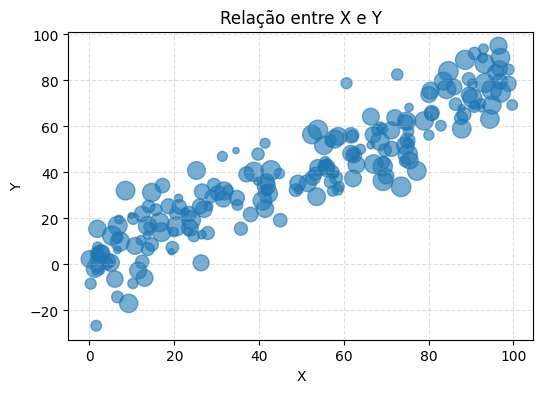

In [11]:
def dispersao():
    np.random.seed(1)
    x = np.random.uniform(0, 100, 200)
    y = 0.8 * x + np.random.normal(0, 10, 200)
    tamanho = np.random.randint(20, 200, 200)

    fig, ax = plt.subplots(figsize=(6, 4))
    sc = ax.scatter(x, y, s=tamanho, alpha=0.6)
    ax.set_title('Relação entre X e Y')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True, linestyle='--', alpha=0.4)
    plt.show()

dispersao()

# 7. Área (area plot)

Quando usar

- Acúmulo ao longo do tempo; similar à linha, mas preenchendo a região sob a curva.
- Empilhamento de áreas para componentes de um total (com cuidado).

## Area Plot

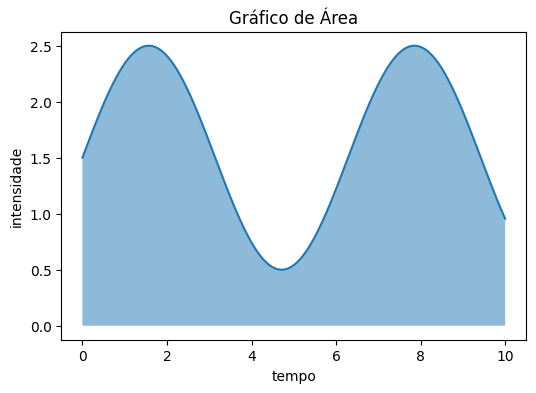

In [12]:
def area():
    x = np.linspace(0, 10, 200)
    y = np.sin(x) + 1.5

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.fill_between(x, y, alpha=0.5)
    ax.plot(x, y)
    ax.set_title('Gráfico de Área')
    ax.set_xlabel('tempo')
    ax.set_ylabel('intensidade')
    plt.show()

area()

# 8. Heatmap (matrizes e correlação)

Quando usar

- Visualização de matrizes (ex.: correlação, confusão de classificação, ocupação por hora×dia).
- Escolher colormap adequado e incluir colorbar.

## Heatmap

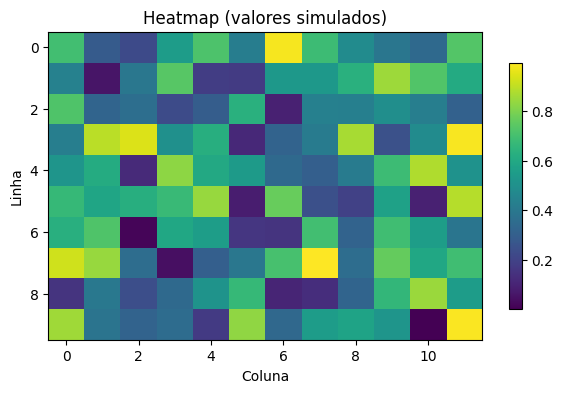

In [13]:
def heatmap():
    np.random.seed(123)
    matriz = np.random.rand(10, 12)  # 10 linhas × 12 colunas

    fig, ax = plt.subplots(figsize=(7, 4))
    im = ax.imshow(matriz, aspect='auto')
    ax.set_title('Heatmap (valores simulados)')
    ax.set_xlabel('Coluna')
    ax.set_ylabel('Linha')
    fig.colorbar(im, ax=ax, shrink=0.8)
    plt.show()

heatmap()

# 9. Barras de erro (error bars) – médias com incerteza

Quando usar

- Comunicar média com desvio-padrão/erro-padrão, intervalos de confiança.

## Error Bars

In [ ]:
def barras_de_erro():
    categorias = ['A', 'B', 'C', 'D']
    medias = np.array([20, 24, 18, 30], dtype=float)
    desvios = np.array([2.1, 1.3, 2.8, 1.7], dtype=float)

    x = np.arange(len(categorias))

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(x, medias, yerr=desvios, capsize=6)
    ax.set_xticks(x, categorias)
    ax.set_title('Média por Categoria (com desvio)')
    ax.set_ylabel('Média')
    plt.show()

barras_de_erro()

# Boas Práticas de Visualização

- Rótulos claros (unidades!), fontes legíveis e contraste adequado.
- Não sobrecarregar a figura (evitar 3D decorativo, sombras inúteis, texturas).
- Ordenar categorias quando fizer sentido; limitar fatias de pizza e preferir barras.
- Sempre verificar se a visualização responde à pergunta do negócio (insight > decoração).
- Acessibilidade: use paletas amigáveis a daltônicos e não codifique apenas por cor.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


dias = np.arange(1,11)
print(dias)
vendas = np.array([17,8,6,20,7,30,9,6,10,3]);
print(vendas)
plt.plot(dias,vendas)
plt.show()

plt.plot(dias,vendas)

font = {'family':'serif', 'color':'blue', 'size': 30}

plt.title("Situação de vendas", fontdict= font)
plt.xlabel("Dias")
plt.ylabel("Vendas")

plt.show()

#Pizza
vendas = np.array([20,47,30,120])
print(vendas)

rotulos = ['Felipe','Ana','José','Maria']
plt.pie(vendas, labels=rotulos, autopct= '%1.1f%%')
plt.legend(rotulos)

plt.show()